In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [34]:
from mocap_labels import WALK_TRIALS, RUN_TRIALS

print(f"Number of walk trials: {len(WALK_TRIALS)}")
print(f"Number of run trials: {len(RUN_TRIALS)}")

Number of walk trials: 31
Number of run trials: 27


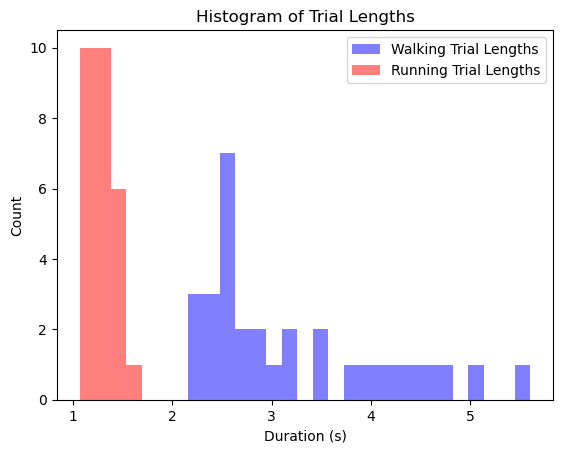

In [35]:


# Let's make histograms of the duration of each trial
walk_trial_lengths = [trial.n_frames / trial.fps for trial in WALK_TRIALS]
run_trial_lengths = [trial.n_frames / trial.fps for trial in RUN_TRIALS]

# Calculate the combined range of both datasets
min_length = min(min(walk_trial_lengths), min(run_trial_lengths))
max_length = max(max(walk_trial_lengths), max(run_trial_lengths))

# Define the bins using the combined range
bins = np.linspace(min_length, max_length, 30)

plt.hist(walk_trial_lengths, bins=bins, alpha=0.5, label='Walking Trial Lengths', color='blue')
plt.hist(run_trial_lengths, bins=bins, alpha=0.5, label='Running Trial Lengths', color='red')
plt.title('Histogram of Trial Lengths')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.legend()


In [36]:
# Let's convert all trials to dataframes

walk_dfs = [trial.as_dataframe() for trial in WALK_TRIALS]
run_dfs = [trial.as_dataframe() for trial in RUN_TRIALS]

In [37]:
# Let's see all the columns in the dataframes
print(walk_dfs[0].columns)

Index(['frame', 'time', 'root_tx', 'root_ty', 'root_tz', 'root_rx', 'root_ry',
       'root_rz', 'lfemur_rx', 'lfemur_ry', 'lfemur_rz', 'ltibia_rx',
       'lfoot_rx', 'lfoot_rz', 'ltoes_rx', 'rfemur_rx', 'rfemur_ry',
       'rfemur_rz', 'rtibia_rx', 'rfoot_rx', 'rfoot_rz', 'rtoes_rx',
       'lowerback_rx', 'lowerback_ry', 'lowerback_rz', 'upperback_rx',
       'upperback_ry', 'upperback_rz', 'thorax_rx', 'thorax_ry', 'thorax_rz',
       'lowerneck_rx', 'lowerneck_ry', 'lowerneck_rz', 'upperneck_rx',
       'upperneck_ry', 'upperneck_rz', 'head_rx', 'head_ry', 'head_rz',
       'lclavicle_ry', 'lclavicle_rz', 'lhumerus_rx', 'lhumerus_ry',
       'lhumerus_rz', 'lradius_rx', 'lwrist_ry', 'lhand_rx', 'lhand_rz',
       'lfingers_rx', 'lthumb_rx', 'lthumb_rz', 'rclavicle_ry', 'rclavicle_rz',
       'rhumerus_rx', 'rhumerus_ry', 'rhumerus_rz', 'rradius_rx', 'rwrist_ry',
       'rhand_rx', 'rhand_rz', 'rfingers_rx', 'rthumb_rx', 'rthumb_rz'],
      dtype='object')


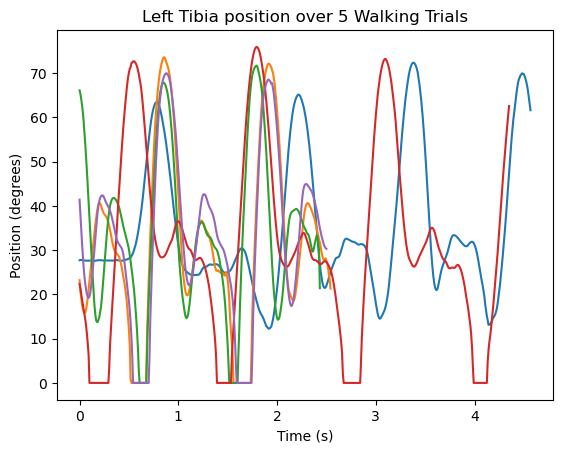

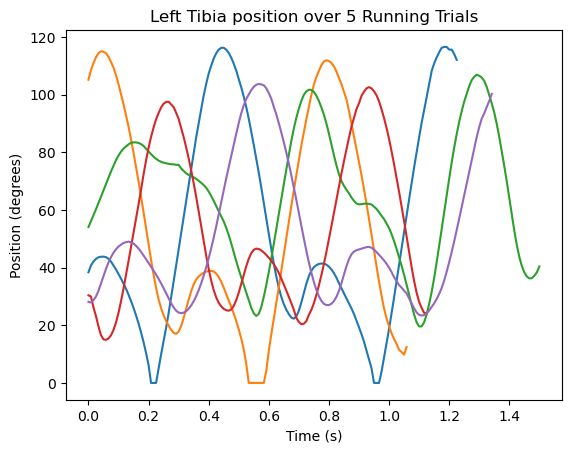

In [39]:
# Next, let's pick one body part: the left tibia, which is the shin bone
# We will plot the position of the tibia over time for trial
# We will plot walking and running on seperate plots, picking the 5 random trials of each

body_part_name = "Left Tibia"
body_part_key = 'ltibia_rx'
n_trials_to_plot = 5

random.seed(0)
random_walk_dfs = random.sample(walk_dfs, n_trials_to_plot)
random_run_dfs = random.sample(run_dfs, n_trials_to_plot)

plt.figure()
plt.title(f'{body_part_name} position over {n_trials_to_plot} Walking Trials')
plt.xlabel('Time (s)')
plt.ylabel('Position (degrees)')
for df in random_walk_dfs:
    plt.plot(df['time'], df[body_part_key])


plt.figure()
plt.title(f'{body_part_name} position over {n_trials_to_plot} Running Trials')
plt.xlabel('Time (s)')
plt.ylabel('Position (degrees)')
for df in random_run_dfs:
    plt.plot(df['time'], df[body_part_key])


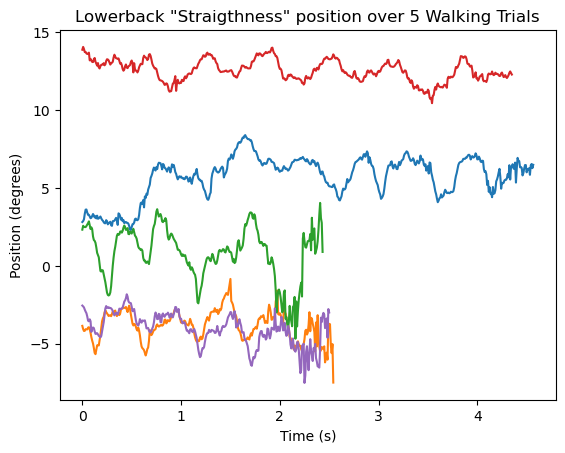

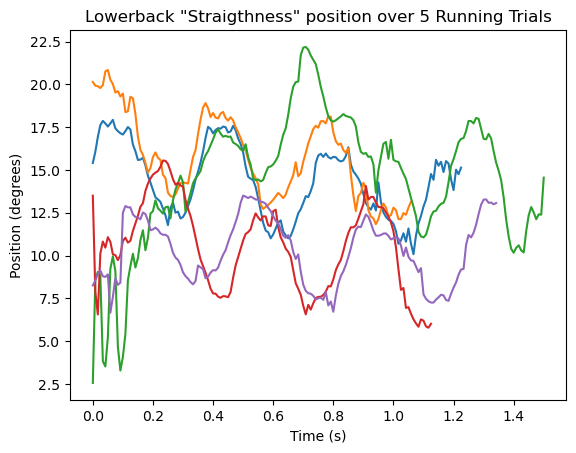

In [50]:
# Repeat the above for lower back straightness

body_part_name = "Lowerback \"Straigthness\""
body_part_key = 'lowerback_rx'

plt.figure()
plt.title(f'{body_part_name} position over {n_trials_to_plot} Walking Trials')
plt.xlabel('Time (s)')
plt.ylabel('Position (degrees)')
for df in random_walk_dfs:
    plt.plot(df['time'], df[body_part_key])


plt.figure()
plt.title(f'{body_part_name} position over {n_trials_to_plot} Running Trials')
plt.xlabel('Time (s)')
plt.ylabel('Position (degrees)')
for df in random_run_dfs:
    plt.plot(df['time'], df[body_part_key])